<a href="https://colab.research.google.com/github/dwaipayan12-dev/Apple-Quality-Prediction/blob/main/Apple_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step_1:Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #accessing google drive to load the dataset from there

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/apple_quality.csv") #reading the dataset

df.isnull().sum() #checking if there is any row with no numbers
print(df[df.isnull().any(axis=1)]) #checking which row has no numbers
df1 = df.drop(['A_id'],axis = 1) #dropping a column containing unnecessary data
df1 = df1.dropna() #dropping rows with no numbers
df1

      A_id  Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
4000   NaN   NaN     NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
4000  Created_by_Nidula_Elgiriyewithana     NaN  


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


Step_2:Use train_test_split() function to split train and test data and save them in two CSV files

In [ ]:
size = 0.5  #size of train data for first instance
dictionary_train = {}
dictionary_test = {}
from sklearn.model_selection import train_test_split
for i in range(0,5,1):  #iterating over all the train data sizes
  train_data, test_data = train_test_split(df1, test_size = size)            #spliting train and test data with size of train data ranging 0.5 to 0.9
  dictionary_train[i] = pd.DataFrame(train_data)                             #creating a dictionary containing train dataset from size 0.5 to 0.9
  dictionary_test[i] = pd.DataFrame(test_data)                               #creating a dictionary containing test dataset from size 0.5 to 0.9
  train_data.to_csv('Apple_quality_train'+str(i+1)+'.csv',index = False)      #saving train data in CSV file of size ranging from 0.5 to 0.9
  test_data.to_csv('Apple_quality_test'+str(i+1)+'.csv',index = False)        #saving test data in CSV file of size ranging from 0.5 to 0.1
  size = size - 0.1  #decreasing the size of train data by 0.1


Step_3:use SVC() CLASSIFIER to train the model with the train data

In [ ]:
from sklearn.svm import SVC
dict1 = {}
dict_train_x_svc = {}
dict_train_y_svc = {}
for i in range(0,5,1):  #iterating over all the train data sizes
  SVM_model = SVC(C = 4.0, kernel = 'rbf',gamma='auto')
  dict1 = dictionary_train[i]                    #collecting train data of a particular size from dictionary_train[i] and storing it in dict1
  train_data1 = pd.DataFrame.from_dict(dict1)     #converting the dictionary to a dataframe
  train_data_x = train_data1.drop(['Quality'],axis = 1)   #creating the dataset with features and storing it in train_data_x
  train_data_y = train_data1['Quality']       #creating the  dataset with targets and storing it in train_data_y
  dict_train_x_svc[i] = pd.DataFrame(train_data_x)    #converting features dataset of various sizes to a dictionary
  dict_train_y_svc[i] = pd.DataFrame(train_data_y)    #converting targets dataset of various sizes to a dictionary


Step_4: Compute classification_report() function available at sklearn to judge the quality of training on the train data

In [ ]:
from sklearn.metrics import classification_report
dict_y_pred_train = {}
for i in range(0,5,1):  #iterating over all the train data sizes
  dict2 = dict_train_x_svc[i]   #collecting feature dataset of a particular size and converting it in a dictionary
  dict3 = dict_train_y_svc[i]   #collecting target dataset of a particular size and converting it in a dictionary
  train_data_x_svc = pd.DataFrame.from_dict(dict2)    #converting the dictionary to dataframe
  train_data_y_svc = pd.DataFrame.from_dict(dict3)
  SVM_model.fit(train_data_x_svc,train_data_y_svc)  #training the model with train data
  y_prediction_train = SVM_model.predict(train_data_x_svc)  #predicting the quality of train data
  dict_y_pred_train[i] = {j+1: pred for j, pred in enumerate(y_prediction_train.flatten())}  #storing the predicted quality in a dictionary
  print(classification_report(train_data_y_svc,y_prediction_train))  #printing the classification report of train data for different sizes of train data


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.97      0.97      0.97       982
        good       0.97      0.98      0.97      1018

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.97      0.98      0.98      1201
        good       0.98      0.97      0.98      1199

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.98      0.97      0.97      1400
        good       0.97      0.98      0.97      1399

    accuracy                           0.97      2799
   macro avg       0.97      0.97      0.97      2799
weighted avg       0.97      0.97      0.97      2799



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.97      0.96      0.97      1584
        good       0.96      0.97      0.97      1615

    accuracy                           0.97      3199
   macro avg       0.97      0.97      0.97      3199
weighted avg       0.97      0.97      0.97      3199



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.97      0.97      0.97      1806
        good       0.97      0.97      0.97      1793

    accuracy                           0.97      3599
   macro avg       0.97      0.97      0.97      3599
weighted avg       0.97      0.97      0.97      3599



Saving the classification report on training data of SVC

In [ ]:

for i in range(0,5,1):
  train_y_svc = pd.DataFrame.from_dict(dict_train_y_svc[i])  #converting dictionary containing target dataset of a various train data size to a dataset
  y_pred_train_svc = pd.DataFrame.from_dict(dict_y_pred_train[i], orient = 'index')  #converting dictionary containing predicted quality of train data to a dataset
  dfcr1 = pd.DataFrame(classification_report(train_y_svc,y_pred_train_svc, output_dict = True))  #creating a dataframe containing classification report of train data
  dfcr2 = dfcr1.transpose()  #transposing the dataframe
  dfcr2.to_csv('SVC_trainData_classification_report'+str(i+1)+'.csv')  #saving the classification report in CSV file

import csv

row_index = 3
col_index = 1

accuracy_values_svc_train = []  #creating an empty list to store the accuracy values of train data
for i in range(0,5,1):  #iterating over all the train data sizes
  file_name = 'SVC_trainData_classification_report'+str(i+1)+'.csv'  #storing the file for each train data size in file_name
  with open(file_name, mode='r') as file:  #opening the file in read mode
    csv_reader = csv.reader(file)  #reading the file
    for i, row in enumerate(csv_reader):  #iterating over the file
        if i == row_index:  #checking if the row index is equal to the row_index
            accuracy_values_svc_train.append(float(row[col_index]))  #storing the accuracy value in accuracy_values_svc_train
            break

print(accuracy_values_svc_train)


[0.9725, 0.9754166666666667, 0.9742765273311897, 0.9674898405751797, 0.9666574048346763]


Step_5:Compute classification_report() function available at sklearn to judge the quality of training on the test data

In [ ]:
dict1 = {}
dict_test_x_svc = {}
dict_test_y_svc = {}
for i in range(0,5,1):  #iterating over all the test data sizes
  dict1 = dictionary_test[i]  #collecting test data of a particular size and converting it in a dictionary
  test_data1 = pd.DataFrame.from_dict(dict1)  #converting the dictionary to a dataframe
  test_data_x = test_data1.drop(['Quality'],axis = 1)  #creating the dataset with features and storing it in test_data_x
  test_data_y = test_data1['Quality']  #creating the  dataset with targets and storing it in test_data_y
  dict_test_x_svc[i] = pd.DataFrame(test_data_x)  #converting features dataset of various sizes to a dictionary
  dict_test_y_svc[i] = pd.DataFrame(test_data_y)  #converting targets dataset of various sizes to a dictionary


In [ ]:
dict_y_pred_test = {}
for i in range(0,5,1):  #iterating over all the test data sizes
  dict2 = dict_test_x_svc[i]  #collecting feature dataset of a particular size and converting it in a dictionary
  dict3 = dict_test_y_svc[i]  #collecting target dataset of a particular size and converting it in a dictionary
  test_data_x_svc = pd.DataFrame.from_dict(dict2)  #converting the dictionary to dataframe
  test_data_y_svc = pd.DataFrame.from_dict(dict3)
  SVM_model.fit(test_data_x_svc,test_data_y_svc)  #training the model with test data
  y_prediction_test = SVM_model.predict(test_data_x_svc)  #predicting the quality of test data
  dict_y_pred_test[i] = {j+1: pred for j, pred in enumerate(y_prediction_test.flatten())}  #storing the predicted quality in a dictionary
  print(classification_report(test_data_y_svc,y_prediction_test))  #printing the classification report of test data for different sizes of train data


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.98      0.97      0.97      1014
        good       0.97      0.97      0.97       986

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.96      0.97      0.97       795
        good       0.97      0.96      0.97       805

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600

              precision    recall  f1-score   support

         bad       0.97      0.97      0.97       596
        good       0.98      0.97      0.97       605

    accuracy                           0.97      1201
   macro avg       0.97      0.97      0.97      1201
weighted avg       0.97      0.97      0.97      1201



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.98      0.99      0.98       412
        good       0.99      0.98      0.98       389

    accuracy                           0.98       801
   macro avg       0.98      0.98      0.98       801
weighted avg       0.98      0.98      0.98       801

              precision    recall  f1-score   support

         bad       0.99      0.99      0.99       190
        good       1.00      1.00      1.00       211

    accuracy                           1.00       401
   macro avg       0.99      0.99      0.99       401
weighted avg       1.00      1.00      1.00       401



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Saving classification report on test data of SVC

In [ ]:
for i in range(0,5,1):
  test_y_svc = pd.DataFrame.from_dict(dict_test_y_svc[i])  #converting dictionary containing target dataset of a various test data size to a dataset
  y_pred_test_svc = pd.DataFrame.from_dict(dict_y_pred_test[i], orient = 'index')  #converting dictionary containing predicted quality of test data to a dataset
  dfcr1 = pd.DataFrame(classification_report(test_y_svc,y_pred_test_svc, output_dict = True))  #creating a dataframe containing classification report of test data
  dfcr2 = dfcr1.transpose()  #transposing the dataframe
  dfcr2.to_csv('SVC_testData_classification_report'+str(i+1)+'.csv')  #saving the classification report in CSV file

import csv

row_index = 3
col_index = 1

accuracy_values_svc_test = []  #creating an empty list to store the accuracy values of test data
for i in range(0,5,1):  #iterating over all the train data sizes
  file_name = 'SVC_testData_classification_report'+str(i+1)+'.csv'  #storing the file for each test data size in file_name
  with open(file_name, mode='r') as file:  #opening the file in read mode
    csv_reader = csv.reader(file)  #reading the file
    for i, row in enumerate(csv_reader):  #iterating over the file
        if i == row_index:  #checking if the row index is equal to the row_index
            accuracy_values_svc_test.append(float(row[col_index]))  #storing the accuracy value in accuracy_values_svc_test
            break

print(accuracy_values_svc_test)  #printing the accuracy values of test data

[0.9735, 0.9675, 0.9725228975853455, 0.982521847690387, 0.9950124688279302]


USE KNeighborsClassifier() to train the model with train data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

dict1 = {}
dict_train_x_knn = {}
dict_train_y_knn = {}
for i in range(0,5,1):
  knn_model = KNeighborsClassifier(n_neighbors=4, weights = 'uniform', algorithm = 'auto', p = 2)
  dict1 = dictionary_train[i]
  train_data1 = pd.DataFrame.from_dict(dict1)
  train_data_x = train_data1.drop(['Quality'],axis = 1)
  train_data_y = train_data1['Quality']
  dict_train_x_knn[i] = pd.DataFrame(train_data_x)
  dict_train_y_knn[i] = pd.DataFrame(train_data_y)



In [ ]:
dict_y_pred_train = {}
for i in range(0,5,1):
  dict2 = dict_train_x_knn[i]
  dict3 = dict_train_y_knn[i]
  train_data_x_knn = pd.DataFrame.from_dict(dict2)
  train_data_y_knn = pd.DataFrame.from_dict(dict3)
  knn_model.fit(train_data_x_knn,train_data_y_knn)
  y_prediction_train_knn = knn_model.predict(train_data_x_knn)
  dict_y_pred_train[i] = {j+1: pred for j, pred in enumerate(y_prediction_train_knn.flatten())}
  print(classification_report(train_data_y_knn,y_prediction_train_knn))


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         bad       0.88      0.96      0.92       982
        good       0.96      0.88      0.92      1018

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         bad       0.90      0.97      0.93      1201
        good       0.96      0.89      0.93      1199

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         bad       0.91      0.96      0.94      1400
        good       0.96      0.91      0.93      1399

    accuracy                           0.93      2799
   macro avg       0.94      0.93      0.93      2799
weighted avg       0.94      0.93      0.93      2799



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         bad       0.91      0.97      0.94      1584
        good       0.97      0.90      0.93      1615

    accuracy                           0.93      3199
   macro avg       0.94      0.94      0.93      3199
weighted avg       0.94      0.93      0.93      3199



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         bad       0.91      0.97      0.93      1806
        good       0.96      0.90      0.93      1793

    accuracy                           0.93      3599
   macro avg       0.93      0.93      0.93      3599
weighted avg       0.93      0.93      0.93      3599



Saving classification report on training data of KNeighborsClassifier

In [ ]:
for i in range(0,5,1):
  train_y_knn = pd.DataFrame.from_dict(dict_train_y_knn[i])
  y_pred_train_knn = pd.DataFrame.from_dict(dict_y_pred_train[i], orient = 'index')
  dfcr1 = pd.DataFrame(classification_report(train_y_knn,y_pred_train_knn, output_dict = True))
  dfcr2 = dfcr1.transpose()
  dfcr2.to_csv('KNN_trainData_classification_report'+str(i+1)+'.csv')

import csv

row_index = 3
col_index = 1

accuracy_values_knn_train = []
for i in range(0,5,1):
  file_name = 'KNN_trainData_classification_report'+str(i+1)+'.csv'
  with open(file_name, mode='r') as file:
    csv_reader = csv.reader(file)
    for i, row in enumerate(csv_reader):
        if i == row_index:
            accuracy_values_knn_train.append(row[col_index])
            break

print(accuracy_values_knn_train)


['0.919', '0.9283333333333333', '0.9349767774205073', '0.9349796811503595', '0.9324812447902195']


Use KNeighborsClassifier() to check the quality of training using test data

In [ ]:
dict1 = {}
dict_test_x_knn = {}
dict_test_y_knn = {}
for i in range(0,5,1):
  dict1 = dictionary_test[i]
  test_data1 = pd.DataFrame.from_dict(dict1)
  test_data_x = test_data1.drop(['Quality'],axis = 1)
  test_data_y = test_data1['Quality']
  dict_test_x_knn[i] = pd.DataFrame(test_data_x)
  dict_test_y_knn[i] = pd.DataFrame(test_data_y)


In [ ]:
dict_y_pred_test = {}
for i in range(0,5,1):
  dict2 = dict_test_x_knn[i]
  dict3 = dict_test_y_knn[i]
  test_data_x_knn = pd.DataFrame.from_dict(dict2)
  test_data_y_knn = pd.DataFrame.from_dict(dict3)
  knn_model.fit(test_data_x_knn,test_data_y_knn)
  y_prediction_test_knn = knn_model.predict(test_data_x_knn)
  dict_y_pred_test[i] = {j+1: pred for j, pred in enumerate(y_prediction_test_knn.flatten())}
  print(classification_report(test_data_y_knn,y_prediction_test_knn))


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         bad       0.90      0.97      0.93      1014
        good       0.96      0.90      0.93       986

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

              precision    recall  f1-score   support

         bad       0.88      0.96      0.92       795
        good       0.95      0.88      0.91       805

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         bad       0.87      0.95      0.91       596
        good       0.95      0.85      0.90       605

    accuracy                           0.90      1201
   macro avg       0.91      0.90      0.90      1201
weighted avg       0.91      0.90      0.90      1201

              precision    recall  f1-score   support

         bad       0.87      0.96      0.91       412
        good       0.95      0.85      0.90       389

    accuracy                           0.91       801
   macro avg       0.91      0.91      0.91       801
weighted avg       0.91      0.91      0.91       801

              precision    recall  f1-score   support

         bad       0.88      0.93      0.90       190
        good       0.93      0.89      0.91       211

    accuracy                           0.91       401
   macro avg       0.91      0.91      0.91       401
weighted avg       0.91      0.91      0.91       401



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Saving classification report on test data of KNeighborsClassifier

In [ ]:
for i in range(0,5,1):
  test_y_knn = pd.DataFrame.from_dict(dict_test_y_knn[i])
  y_pred_test_knn = pd.DataFrame.from_dict(dict_y_pred_test[i], orient = 'index')
  dfcr1 = pd.DataFrame(classification_report(test_y_knn,y_pred_test_knn, output_dict = True))
  dfcr2 = dfcr1.transpose()
  dfcr2.to_csv('KNN_testData_classification_report'+str(i+1)+'.csv')

import csv

row_index = 3
col_index = 1

accuracy_values_knn_test = []
for i in range(0,5,1):
  file_name = 'KNN_testData_classification_report'+str(i+1)+'.csv'
  with open(file_name, mode='r') as file:
    csv_reader = csv.reader(file)
    for i, row in enumerate(csv_reader):
        if i == row_index:
            accuracy_values_knn_test.append(float(row[col_index]))
            break

print(accuracy_values_knn_test)


[0.931, 0.915625, 0.9034138218151541, 0.9076154806491885, 0.9052369077306733]


Use MLPClassifier() CLASSIFIER to train the model with the train data

In [ ]:
from sklearn.neural_network import MLPClassifier
dict1 = {}
dict_train_x_mlp = {}
dict_train_y_mlp = {}
for i in range(0,5,1):
  mlp_model = MLPClassifier(alpha=0.01,max_iter=300,random_state=42)
  dict1 = dictionary_train[i]
  train_data1 = pd.DataFrame.from_dict(dict1)
  train_data_x = train_data1.drop(['Quality'],axis = 1)
  train_data_y = train_data1['Quality']
  dict_train_x_mlp[i] = pd.DataFrame(train_data_x)
  dict_train_y_mlp[i] = pd.DataFrame(train_data_y)


Compute classification report() to check the quality of training on the train data

In [ ]:
dict_y_pred_train = {}
for i in range(0,5,1):
  dict2 = dict_train_x_mlp[i]
  dict3 = dict_train_y_mlp[i]
  train_data_x_mlp = pd.DataFrame.from_dict(dict2)
  train_data_y_mlp = pd.DataFrame.from_dict(dict3)
  mlp_model.fit(train_data_x_mlp,train_data_y_mlp)
  y_prediction_train_mlp = mlp_model.predict(train_data_x_mlp)
  dict_y_pred_train[i] = {j+1: pred for j, pred in enumerate(y_prediction_train_mlp.flatten())}
  print(classification_report(train_data_y_mlp,y_prediction_train_mlp))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.94      0.94      0.94       982
        good       0.94      0.94      0.94      1018

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

         bad       0.96      0.95      0.95      1201
        good       0.95      0.96      0.95      1199

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.96      0.95      0.95      1400
        good       0.95      0.96      0.95      1399

    accuracy                           0.95      2799
   macro avg       0.95      0.95      0.95      2799
weighted avg       0.95      0.95      0.95      2799



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

         bad       0.97      0.96      0.96      1584
        good       0.96      0.97      0.96      1615

    accuracy                           0.96      3199
   macro avg       0.96      0.96      0.96      3199
weighted avg       0.96      0.96      0.96      3199



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

         bad       0.97      0.96      0.96      1806
        good       0.96      0.97      0.96      1793

    accuracy                           0.96      3599
   macro avg       0.96      0.96      0.96      3599
weighted avg       0.96      0.96      0.96      3599



Saving classification_report() function available at sklearn to judge the quality of training on the train data

In [ ]:
for i in range(0,5,1):
  train_y_mlp = pd.DataFrame.from_dict(dict_train_y_mlp[i])
  y_pred_train_mlp = pd.DataFrame.from_dict(dict_y_pred_train[i], orient = 'index')
  dfcr1 = pd.DataFrame(classification_report(train_y_mlp,y_pred_train_mlp, output_dict = True))
  dfcr2 = dfcr1.transpose()
  dfcr2.to_csv('MLP_trainData_classification_report'+str(i+1)+'.csv')

import csv

row_index = 3
col_index = 1

accuracy_values_mlp_train = []
for i in range(0,5,1):
  file_name = 'MLP_trainData_classification_report'+str(i+1)+'.csv'
  with open(file_name, mode='r') as file:
    csv_reader = csv.reader(file)
    for i, row in enumerate(csv_reader):
        if i == row_index:
            accuracy_values_mlp_train.append(float(row[col_index]))
            break

print(accuracy_values_mlp_train)


[0.9375, 0.95375, 0.9542693819221151, 0.9624882775867458, 0.963878855237566]


Compute classification_report() function available at sklearn to judge the quality of training on the test data

In [ ]:
dict1 = {}
dict_test_x_mlp = {}
dict_test_y_mlp = {}
for i in range(0,5,1):
  dict1 = dictionary_test[i]
  test_data1 = pd.DataFrame.from_dict(dict1)
  test_data_x = test_data1.drop(['Quality'],axis = 1)
  test_data_y = test_data1['Quality']
  dict_test_x_mlp[i] = pd.DataFrame(test_data_x)
  dict_test_y_mlp[i] = pd.DataFrame(test_data_y)



In [ ]:
dict_y_pred_test = {}
for i in range(0,5,1):
  dict2 = dict_test_x_mlp[i]
  dict3 = dict_test_y_mlp[i]
  test_data_x_mlp = pd.DataFrame.from_dict(dict2)
  test_data_y_mlp = pd.DataFrame.from_dict(dict3)
  mlp_model.fit(test_data_x_mlp,test_data_y_mlp)
  y_prediction_test_mlp = mlp_model.predict(test_data_x_mlp)
  dict_y_pred_test[i] = {j+1: pred for j, pred in enumerate(y_prediction_test_mlp.flatten())}
  print(classification_report(test_data_y_mlp,y_prediction_test_mlp))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.95      0.94      0.94      1014
        good       0.93      0.94      0.94       986

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

         bad       0.93      0.92      0.93       795
        good       0.93      0.94      0.93       805

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.84      0.84      0.84       596
        good       0.84      0.84      0.84       605

    accuracy                           0.84      1201
   macro avg       0.84      0.84      0.84      1201
weighted avg       0.84      0.84      0.84      1201



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.86      0.88      0.87       412
        good       0.87      0.85      0.86       389

    accuracy                           0.86       801
   macro avg       0.86      0.86      0.86       801
weighted avg       0.86      0.86      0.86       801



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.90      0.86      0.88       190
        good       0.88      0.91      0.90       211

    accuracy                           0.89       401
   macro avg       0.89      0.89      0.89       401
weighted avg       0.89      0.89      0.89       401



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Saving classification report() of the test data of MLP Classifier()

In [ ]:
for i in range(0,5,1):
  test_y_mlp = pd.DataFrame.from_dict(dict_test_y_mlp[i])
  y_pred_test_mlp = pd.DataFrame.from_dict(dict_y_pred_test[i], orient = 'index')
  dfcr1 = pd.DataFrame(classification_report(test_y_mlp,y_pred_test_mlp, output_dict = True))
  dfcr2 = dfcr1.transpose()
  dfcr2.to_csv('MLP_testData_classification_report'+str(i+1)+'.csv')

import csv

row_index = 3
col_index = 1

accuracy_values_mlp_test = []
for i in range(0,5,1):
  file_name = 'MLP_testData_classification_report'+str(i+1)+'.csv'
  with open(file_name, mode='r') as file:
    csv_reader = csv.reader(file)
    for i, row in enumerate(csv_reader):
        if i == row_index:
            accuracy_values_mlp_test.append(float(row[col_index]))
            break

print(accuracy_values_mlp_test)

[0.94, 0.93, 0.839300582847627, 0.8626716604244694, 0.8877805486284289]


USE GaussianNB() to train the model with train data

In [ ]:
from sklearn.naive_bayes import GaussianNB
dict1 = {}
dict_train_x_nb = {}
dict_train_y_nb = {}
for i in range(0,5,1):
  nb_model = GaussianNB(var_smoothing=1e-11)
  dict1 = dictionary_train[i]
  train_data1 = pd.DataFrame.from_dict(dict1)
  train_data_x = train_data1.drop(['Quality'],axis = 1)
  train_data_y = train_data1['Quality']
  dict_train_x_nb[i] = pd.DataFrame(train_data_x)
  dict_train_y_nb[i] = pd.DataFrame(train_data_y)


compute classification_report() function available at sklearn to judge the quality of training on the test data

In [ ]:
dict_y_pred_train = {}
for i in range(0,5,1):
  dict2 = dict_train_x_nb[i]
  dict3 = dict_train_y_nb[i]
  train_data_x_nb = pd.DataFrame.from_dict(dict2)
  train_data_y_nb = pd.DataFrame.from_dict(dict3)
  nb_model.fit(train_data_x_nb,train_data_y_nb)
  y_prediction_train_nb = nb_model.predict(train_data_x_nb)
  dict_y_pred_train[i] = {j+1: pred for j, pred in enumerate(y_prediction_train_nb.flatten())}
  print(classification_report(train_data_y_nb,y_prediction_train_nb))

              precision    recall  f1-score   support

         bad       0.75      0.74      0.75       982
        good       0.75      0.77      0.76      1018

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

              precision    recall  f1-score   support

         bad       0.76      0.75      0.75      1201
        good       0.75      0.77      0.76      1199

    accuracy                           0.76      2400
   macro avg       0.76      0.76      0.76      2400
weighted avg       0.76      0.76      0.76      2400



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.75      0.76      0.75      1400
        good       0.75      0.75      0.75      1399

    accuracy                           0.75      2799
   macro avg       0.75      0.75      0.75      2799
weighted avg       0.75      0.75      0.75      2799

              precision    recall  f1-score   support

         bad       0.75      0.75      0.75      1584
        good       0.75      0.76      0.76      1615

    accuracy                           0.75      3199
   macro avg       0.75      0.75      0.75      3199
weighted avg       0.75      0.75      0.75      3199



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.75      0.75      0.75      1806
        good       0.75      0.75      0.75      1793

    accuracy                           0.75      3599
   macro avg       0.75      0.75      0.75      3599
weighted avg       0.75      0.75      0.75      3599



Saving classification report() of the train data of GaussianNB()

In [ ]:
for i in range(0,5,1):
  train_y_nb = pd.DataFrame.from_dict(dict_train_y_nb[i])
  y_pred_train_nb = pd.DataFrame.from_dict(dict_y_pred_train[i], orient = 'index')
  dfcr1 = pd.DataFrame(classification_report(train_y_nb,y_pred_train_nb, output_dict = True))
  dfcr2 = dfcr1.transpose()
  dfcr2.to_csv('NB_trainData_classification_report'+str(i+1)+'.csv')

import csv

row_index = 3
col_index = 1

accuracy_values_nb_train = []
for i in range(0,5,1):
  file_name = 'NB_trainData_classification_report'+str(i+1)+'.csv'
  with open(file_name, mode='r') as file:
    csv_reader = csv.reader(file)
    for i, row in enumerate(csv_reader):
        if i == row_index:
            accuracy_values_nb_train.append(float(row[col_index]))
            break

print(accuracy_values_nb_train)

[0.7525, 0.7570833333333333, 0.7531261164701679, 0.7530478274460769, 0.7499305362600722]


Compute classification_report() function of GaussianNB() to judge the quality of training on the test data

In [ ]:
dict1 = {}
dict_test_x_nb = {}
dict_test_y_nb = {}
for i in range(0,5,1):
  dict1 = dictionary_test[i]
  test_data1 = pd.DataFrame.from_dict(dict1)
  test_data_x = test_data1.drop(['Quality'],axis = 1)
  test_data_y = test_data1['Quality']
  dict_test_x_nb[i] = pd.DataFrame(test_data_x)
  dict_test_y_nb[i] = pd.DataFrame(test_data_y)



In [ ]:
dict_y_pred_test = {}
for i in range(0,5,1):
  dict2 = dict_test_x_nb[i]
  dict3 = dict_test_y_nb[i]
  test_data_x_nb = pd.DataFrame.from_dict(dict2)
  test_data_y_nb = pd.DataFrame.from_dict(dict3)
  nb_model.fit(test_data_x_nb,test_data_y_nb)
  y_prediction_test_nb = nb_model.predict(test_data_x_nb)
  dict_y_pred_test[i] = {j+1: pred for j, pred in enumerate(y_prediction_test_nb.flatten())}
  print(classification_report(test_data_y_nb,y_prediction_test_nb))


              precision    recall  f1-score   support

         bad       0.75      0.77      0.76      1014
        good       0.76      0.73      0.74       986

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         bad       0.73      0.76      0.75       795
        good       0.75      0.73      0.74       805

    accuracy                           0.74      1600
   macro avg       0.74      0.74      0.74      1600
weighted avg       0.74      0.74      0.74      1600

              precision    recall  f1-score   support

         bad       0.75      0.76      0.75       596
        good       0.76      0.75      0.75       605

    accuracy                           0.75      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.75      0.75      0.75      1201

              precision    recall  f1-score   support

         bad       0.74      0.77      0.76       412
        good       0.75      0.72      0.73       389

    accuracy                           0.75       801
   macro avg       0.75      0.74      0.74       801
weighted avg       0.75      0.75      0.75       801

              preci

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Saving classification_report() of GaussianNB of test data

In [ ]:
for i in range(0,5,1):
  test_y_nb = pd.DataFrame.from_dict(dict_test_y_nb[i])
  y_pred_test_nb = pd.DataFrame.from_dict(dict_y_pred_test[i], orient = 'index')
  dfcr1 = pd.DataFrame(classification_report(test_y_nb,y_pred_test_nb, output_dict = True))
  dfcr2 = dfcr1.transpose()
  dfcr2.to_csv('NB_testData_classification_report'+str(i+1)+'.csv')

import csv

row_index = 3
col_index = 1

accuracy_values_nb_test = []
for i in range(0,5,1):
  file_name = 'NB_testData_classification_report'+str(i+1)+'.csv'
  with open(file_name, mode='r') as file:
    csv_reader = csv.reader(file)
    for i, row in enumerate(csv_reader):
        if i == row_index:
            accuracy_values_nb_test.append(float(row[col_index]))
            break

print(accuracy_values_nb_test)


[0.751, 0.74375, 0.7527060782681099, 0.7453183520599251, 0.7780548628428927]


using matplotlib to plot accuracy vs train_data_percentage graph

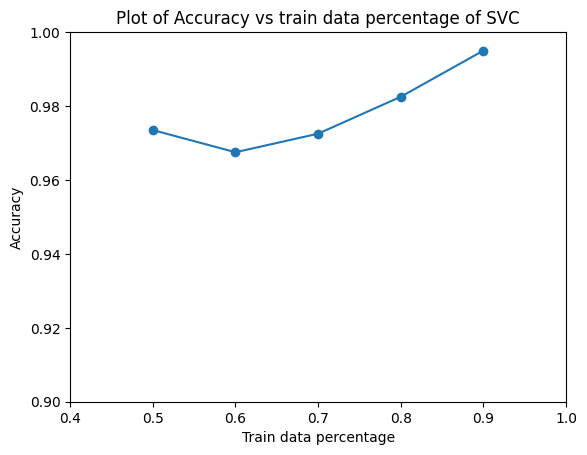

In [ ]:
#1. Accuracy from test data vs train_data percentage of SVC()
import matplotlib.pyplot as plt


x_values = [0.5, 0.6, 0.7, 0.8, 0.9]
y_values = accuracy_values_svc_test

# Plot the data
plt.plot(x_values, y_values, marker='o')

# Setting x and y limits
plt.xlim(0.40, 1.00)
plt.ylim(0.90, 1.00)

# Adding title and labels
plt.title('Plot of Accuracy vs train data percentage of SVC')
plt.xlabel('Train data percentage')
plt.ylabel('Accuracy')

# Display the plot
plt.show()


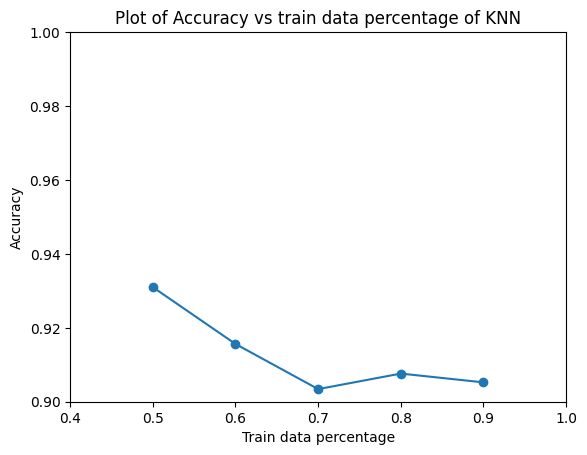

In [ ]:
#2. Accuracy from test data vs train_data percentage of KNN()
import matplotlib.pyplot as plt


x_values = [0.5, 0.6, 0.7, 0.8, 0.9]
y_values = accuracy_values_knn_test

# Plot the data with a circle as marker
plt.plot(x_values, y_values, marker='o')

# Setting x and y limits
plt.xlim(0.40, 1.00)
plt.ylim(0.90, 1.00)

# Adding title and labels
plt.title('Plot of Accuracy vs train data percentage of KNN')
plt.xlabel('Train data percentage')
plt.ylabel('Accuracy')

# Display the plot
plt.show()

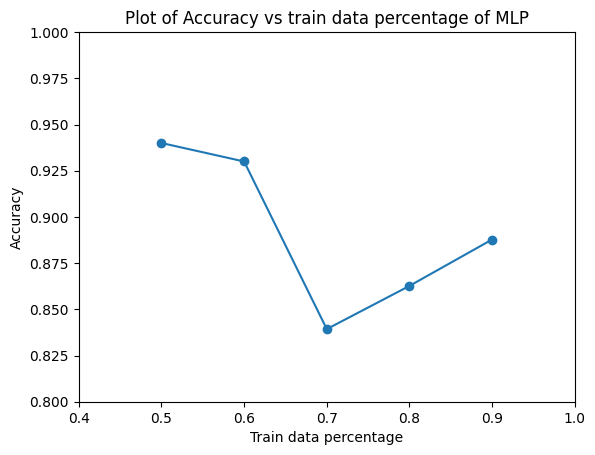

In [ ]:
#3. Accuracy from test data vs train_data percentage of MLP()
import matplotlib.pyplot as plt


x_values = [0.5, 0.6, 0.7, 0.8, 0.9]
y_values = accuracy_values_mlp_test

# Plot the data
plt.plot(x_values, y_values, marker='o')

# Setting x and y limits
plt.xlim(0.40, 1.00)
plt.ylim(0.80, 1.00)

# Adding title and labels
plt.title('Plot of Accuracy vs train data percentage of MLP')
plt.xlabel('Train data percentage')
plt.ylabel('Accuracy')

# Display the plot
plt.show()

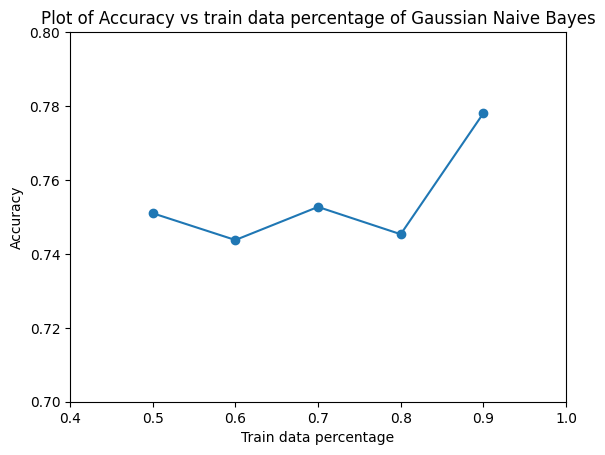

In [ ]:
#4. Accuracy from test data vs train_data percentage of GaussianNB()
import matplotlib.pyplot as plt


x_values = [0.5, 0.6, 0.7, 0.8, 0.9]
y_values = accuracy_values_nb_test

# Plot the data
plt.plot(x_values, y_values, marker='o')

# Setting x and y limits
plt.xlim(0.40, 1.00)
plt.ylim(0.70, 0.80)

# Adding title and labels
plt.title('Plot of Accuracy vs train data percentage of Gaussian Naive Bayes')
plt.xlabel('Train data percentage')
plt.ylabel('Accuracy')

# Display the plot
plt.show()